## Imports

In [1]:
!pip install pyccel

     |████████████████████████████████| 276kB 4.4MB/s 
     |████████████████████████████████| 81kB 5.1MB/s 
     |████████████████████████████████| 61kB 3.8MB/s 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [3]:
def solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu):
    
    for n in range(nt):
      for i in range(nx):
        un[i] = u[i]
      for i in range(1, nx-1):
        u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])    
    return 0

## Numba accelerator

In [4]:
@njit(fastmath=True)
def solve_1d_diff_numba(u, un, nt, nx, dt, dx, nu):
    for n in range(nt):
      for i in range(nx):
        un[i] = u[i]
      for i in range(1, nx-1):
        u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])    
    return 0

## Pyccel accelerator

In [5]:
def solve_1d_diff_pyccel(u : 'float[:]', un : 'float[:]', nt : 'int', nx : 'int', dt : 'float', dx : 'float', nu : 'float'):
    
    for n in range(nt):
      for i in range(nx):
        un[i] = u[i]
      for i in range(1, nx-1):
        u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])    
    return 0

## Inputs

Text(0.5, 1.0, '1D Diffusion')

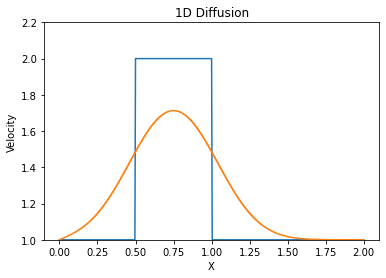

In [6]:
nx = 501
dx = 2 / (nx - 1) 
nt = 3500    #the number of timesteps we want to calculate
nu = 0.3   #the value of viscosity
CFL = .5 #sigma is a parameter, we'll learn more about it later
dt = CFL * dx**2 / nu #dt is defined using sigma ... more later!
grid = np.linspace(0,2,nx) # creating the space grid

u0 = np.ones(nx)      #a numpy array with nx elements all equal to 1.
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0);
u = u0.copy()
un = np.ones(nx) #our placeholder array, un, to advance the solution in time

solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu)
#Plotting data
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Diffusion') 

## Call Funtions

### Pure function

In [7]:
%timeit solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu)

1 loop, best of 5: 3.03 s per loop


### Function with numba accelerator

In [8]:
%timeit solve_1d_diff_numba(u, un, nt, nx, dt, dx, nu)

The slowest run took 980.17 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 725 µs per loop


### Function with pyccel accelerator

In [9]:
solve_1d_diff_f90 = epyccel(solve_1d_diff_pyccel)

In [10]:
%timeit solve_1d_diff_f90(u, un, nt, nx, dt, dx, nu)

100 loops, best of 5: 2.91 ms per loop
